# データ解析特論 2022年度水曜２限

# 第3回 その3 重線形回帰

In [2]:
# ライブラリ
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D, art3d
from ipywidgets import interact 

## 重線形回帰とは

重回帰は目的変数に対して説明変数が複数ある場合に用いる手法で，

$$
y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_M x_M = a_0 + \sum_{j=1}^M a_j x_j + \xi
$$

というモデルを当てはめる方法である．ただし，

- $y$ は目的変数（データとして与えられるもの）
- $x_j \ (j=1,2,\ldots,M)$ は説明変数（データとして与えられるもの）
- $a_j \ (j=0,1,2,\ldots,M)$ は回帰係数（データから求めるもの）
- $\xi$ はノイズ（モデルでは当てはめられないランダムな要因）

以下，特に注意しない限り__データは実数値__とする．


$M$ 個の説明変数と $M$ 個の回帰係数を 

$$
\begin{align}
& \mathbf X = (x_1, x_2, \ldots, x_M) \in \mathbb R^M,\\
& \mathbf A = (a_1, a_2, \ldots, a_M) \in \mathbb R^M
\end{align}
$$

とそれぞれ $M$ 次元ベクトルで表すことで

$$
y = a_0 + \mathbf X \cdot \mathbf A + \xi
$$

と内積の形で表示することができる．さらに定数の部分もまとめて 

$$
\begin{align}
& \tilde{\mathbf X} = (1, x_1, x_2, \ldots, x_M) \in \mathbb R^M,\\
& \tilde{\mathbf A} = (a_0, a_1, a_2, \ldots, a_M) \in \mathbb R^M
\end{align}
$$

とおくことで

$$
y = \tilde{\mathbf X} \cdot \tilde{\mathbf A} + \xi
$$

と表すこともできる．

ノイズはしばしば平均 $0$ の正規分布 $\mathrm N(0, \sigma^2)$ に従う確率変数とみなして用いる．

### 単回帰のとき（復習）

回帰変数1つの単回帰では，データ空間 $(x, y)$ の2次元平面に回帰直線を引き，
データから直線までの高さの二乗和が最小になるようにパラメータを選んだ．

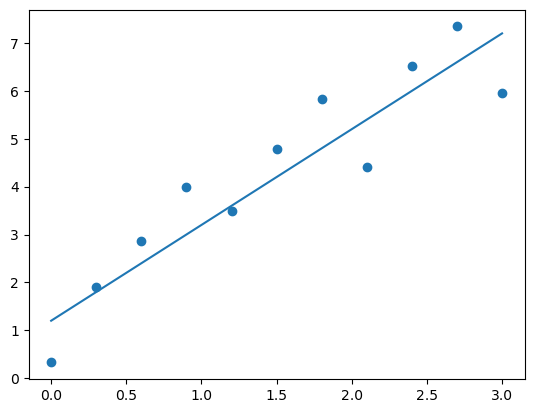

In [3]:
# データを生成するためのパラメータの真値
A0, A1 = 1.2, 2.0
# dataset 生成
X = np.arange(0, 3.01, 0.3)
Y = A0 + A1*X + np.random.randn(X.size) # np.random.normal(loc=0, scale=1, size=X.size)
x0, x1 = np.min(X), np.max(X)
plt.scatter(X, Y)
plt.plot([x0, x1], [A0+A1*x0, A0+A1*x1])

In [ ]:
# 共分散行列
np.cov(X, Y)

# cov の出力はサイズではなく自由度で割られている



In [ ]:
# 散布図と真の回帰直線



In [10]:
import matplotlib.patches as patches
# 回帰直線と二乗誤差のプロット用関数
def plot_XY(a0=0.0, a1=0.0):
    Ypred = a0 + a1*X
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.scatter(X, Y)
    ax.plot([x0, x1], [A0+A1*x0, A0+A1*x1], 'k:', label='truth')
    ax.plot([x0, x1], [a0+a1*x0, a0+a1*x1], c='tab:orange', label='predicted')
    ax.set_xlim(x0-0.5, x1+0.5)
    MSE = np.mean((Y-Ypred)**2)
    ax.set_title('MSE = %f'%MSE)
    
    for i in range(X.size):
        sq = patches.Rectangle(xy=(X[i], Ypred[i]), 
                               width =np.abs(Y[i]-Ypred[i]), 
                               height=np.abs(Y[i]-Ypred[i]), alpha=0.5)
        ax.add_patch(sq)

In [11]:


# 青点がデータ点
# 赤が回帰直線
# 緑の長方形が二乗誤差：長方形の総面積が誤差二乗和
# MSE = Mean Squared Error = 平均二乗誤差

# 必ずしも真のパラメータのときに平均二乗誤差最小になるわけではないことに注意しよう．
# ipywidgets.interact を用いてパラメータを逐次変えて描画
interact(plot_XY, a0=(-5, 5, 0.1), a1=(-5, 5, 0.1))

interactive(children=(FloatSlider(value=0.0, description='a0', max=5.0, min=-5.0), FloatSlider(value=0.0, desc…

<function __main__.plot_XY(a0=0.0, a1=0.0)>

### 重回帰では

回帰変数2つの重回帰では，データ空間 $(x_1, x_2, y)$ の3次元空間に回帰平面を引き，データから平面までの高さの二乗和が最小になるように選ぶ．

In [12]:
# データを生成するためのパラメータの真値
A0 = 1.2
A1 = 1.8
A2 = 0.2
# dataset 生成
N = 100
X1 = np.random.rand(N) * 3.0 # U(0, 3) uniform distribution on [0, 3]
X2 = np.random.rand(N) * 3.0
Y = A0 + A1*X1 + A2*X2 + np.random.randn(X1.size)

In [24]:
%matplotlib inline
# 散布図と回帰平面のプロット用の関数
def plot_X1X2Y(a0=1.0, a1=2.0, a2=0.0, azimuth=20, elevation=30):
    fig = plt.figure(figsize=(2, 2))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(X1, X2, Y)
    X1mesh, X2mesh = np.arange(0, 3.01, 0.6), np.arange(0, 3.01, 0.6)
    X1mesh, X2mesh = np.meshgrid(X1mesh, X2mesh)
    Ymesh = a0 + a1*X1mesh + a2*X2mesh
    ax.plot_wireframe(X1mesh, X2mesh, Ymesh, color='tab:orange')
    ax.view_init(azim=azimuth, elev=elevation)
    Ypred = a0 + a1*X1 + a2*X2
    MSE =  np.mean( (Y-Ypred)**2 )
    ax.set_title('MSE = %.4f'%MSE)
interact(plot_X1X2Y, a0=(-2, 2, 0.1), a1=(-2, 2, 0.1), a2=(-2, 2, 0.1),
        azimuth=(0, 360, 10), elevation=(0, 90, 10))

interactive(children=(FloatSlider(value=1.0, description='a0', max=2.0, min=-2.0), FloatSlider(value=2.0, desc…

<function __main__.plot_X1X2Y(a0=1.0, a1=2.0, a2=0.0, azimuth=20, elevation=30)>

In [ ]:
# ipywidgets.interact を用いてパラメータを逐次変えて描画


# 青点がデータ点
# 赤が回帰平面
# MSE = Mean Squared Error = 平均二乗誤差

# 必ずしも真のパラメータのときに平均二乗誤差最小になるわけではないことに注意しよう．

## 学習方法

上では手動で回帰係数を動かして回帰モデルを作った．最適なパラメータを計算してみよう．

---
### モデル推定値

$N$ 組みのデータセット 

$$
\left\{ (x_1^{(i)}, x_2^{(i)}, \ldots, x_M^{(i)}, y^{(i)}) \right\}_{i=1}^N \quad \left( = \left\{ (\mathbf x^{(i)}, y^{(i)}) \right\}_{i=1}^N \right)
$$

があるとしよう．パラメータ $\mathbf A$ で作った重回帰モデルの推定値は

$$
a_0 + \sum_{j=1}^M a_j x_j^{(i)} + \xi^{(i)}
$$

である．ここで $\xi^{(i)}$ は $i$ 番目のデータに対するランダムさ $\xi$ の実現値である．

$\xi$ は平均 $0$ だったので，推定値の期待値は

$$
a_0 + \sum_{j=1}^M a_j x_j^{(i)}
$$

である．

---
### 回帰残差

したがって，パラメータ $\mathbf A$ で作った重回帰モデルによって得られる $i$ 番目のデータに対する推定値の誤差（回帰残差）の期待値は

$$
e^{(i)} := y^{(i)} - a_0 - \sum_{j=1}^M a_j x_j^{(i)}
$$

である．

---
### 平均二乗誤差

誤差平方（二乗誤差）は

$$
(e^{(i)})^2 = \left( y^{(i)} - a_0 - \sum_{j=1}^M a_j x_j^{(i)} \right)^2
$$

なので，平均二乗誤差は，$N$ 個のデータセットに対する誤差平方の平均値であるから，

$$
E(a_0, a_1, \ldots, a_N) := \frac1N \sum_{i=1}^N (e^{(i)})^2 = \frac1N \sum_{i=1}^N \left( y^{(i)} - a_0 - \sum_{j=1}^M a_j x_j^{(i)} \right)^2
$$

となる．

平均二乗誤差は，モデルのパラメータ $\tilde{\mathbf A} = (a_0, a_1, \ldots, a_M)$ が変わるごとに変化するので，$a_0, a_1, \ldots, a_M$ の関数 $E(a_0, a_1, \ldots, a_M)$ として置くことにする．

---
## 最小二乗法

重回帰モデルのパラメータを決定するために，平均二乗誤差を最小にするパラメータを求めることにする．これを最小二乗法と呼ぶ．（平均二乗誤差最小以外のパラメータフィッティングの方法もある．）

つまり，平均二乗誤差の関数 $E(a_0, a_1, \ldots, a_M)$ が最小の値となるパラメータ $a_0, a_1, \ldots, a_M$ を求める．計算方法は単純に多変数関数の極値問題を解けば良い．

極値の候補を求めるには，$a_0, a_1, \ldots, a_M$ それぞれの変数に関する偏導関数を計算して，全ての偏導関数の値が $0$ になる点（勾配が零ベクトルとなる点）を求めれば良い．

---
### 回帰残差の勾配

先に回帰残差について偏導関数を計算しておこう．

$$
\begin{align}
& \frac{\partial e^{(i)}}{\partial a_0} = \frac{\partial}{\partial a_0} \left( y^{(i)} - a_0 - \sum_{j=1}^M a_j x_j^{(i)} \right) = -1,
\\
(k=1, 2, \ldots, M) \quad & \frac{\partial e^{(i)}}{\partial a_k} = \frac{\partial}{\partial a_k} \left( y^{(i)} - a_0 - \sum_{j=1}^M a_j x_j^{(i)} \right) = -\sum_{j=1}^M \frac{\partial}{\partial a_k} a_j x_j^{(i)} = -\sum_{j=1}^M \delta_{jk} x_j^{(i)}
= -x_k^{(i)}.
\end{align}
$$

---
### 平均二乗誤差の勾配

これにより平均二乗誤差の偏導関数は

$$
\begin{align}
& \frac{\partial E}{\partial a_0} = \frac{\partial}{\partial a_0} \frac1N \sum_{i=1}^N (e^{(i)})^2
= \frac2N \sum_{i=1}^N e^{(i)} \frac{\partial e^{(i)}}{\partial a_0} = -\frac2N \sum_{i=1}^N e^{(i)} \\
& \phantom{\frac{\partial E}{\partial a_0}} = -\frac2N \sum_{i=1}^N \left( y^{(i)} - a_0 - \sum_{j=1}^M a_j x_j^{(i)} \right) = -2 \left\{ \frac1N \sum_{i=1}^N y^{(i)} - a_0 - \sum_{j=1}^M a_j \left( \frac1N \sum_{i=1}^N x_j^{(i)} \right) \right\} \\
& \phantom{\frac{\partial E}{\partial a_0}} := -2 \left( \langle y \rangle - a_0 - \sum_{j=1}^M a_j \langle x_j \rangle \right),
\\
(k=1, 2, \ldots, M) \quad & \frac{\partial E}{\partial a_k} = \frac{\partial}{\partial a_k} \frac1N \sum_{i=1}^N (e^{(i)})^2
= \frac2N \sum_{i=1}^N e^{(i)} \frac{\partial e^{(i)}}{\partial a_k} = -\frac2N \sum_{i=1}^N e^{(i)} x_k^{(i)} = \frac2N \sum_{i=1}^N e^{(i)} \frac{\partial e^{(i)}}{\partial a_k} = -\frac2N \sum_{i=1}^N e^{(i)} x_k^{(i)} \\
& \phantom{\frac{\partial E}{\partial a_k}} = -\frac2N \sum_{i=1}^N \left( y^{(i)} - a_0 - \sum_{j=1}^M a_j x_j^{(i)} \right) x_k^{(i)} = -2 \left\{ \frac1N \sum_{i=1}^N y^{(i)} x_k^{(i)} - a_0 \frac1N \sum_{i=1}^N x_k^{(i)} - \sum_{j=1}^M a_j \left( \frac1N \sum_{i=1}^N x_j^{(i)} x_k^{(i)} \right) \right\} \\
& \phantom{\frac{\partial E}{\partial a_0}} := -2 \left( \langle y x_k \rangle - a_0 \langle x_k \rangle - \sum_{j=1}^M a_j \langle x_k x_j \rangle \right),
\end{align}
$$

となる．

---
### 平均二乗誤差の極値

$\frac{\partial E}{\partial a_k}=0$ が全ての $k=0, 1, 2, \ldots, M$ で成り立つとすると

$$
\begin{align}
&
\begin{cases}
\displaystyle \frac{\partial E}{\partial a_0} = 0 \\[5pt]
\displaystyle \frac{\partial E}{\partial a_k} = 0 & (k = 1, 2, \ldots, M)
\end{cases}
\quad \Longleftrightarrow \quad
\begin{cases}
\displaystyle \langle y \rangle - a_0 - \sum_{j=1}^M a_j \langle x_j \rangle = 0 \\
\displaystyle \langle y x_k \rangle - a_0 \langle x_k \rangle - \sum_{j=1}^M a_j \langle x_k x_j \rangle = 0  & (k = 1, 2, \ldots, M)
\end{cases}
\\
&
\Longleftrightarrow \quad
\begin{cases}
\displaystyle a_0 + \sum_{j=1}^M a_j \langle x_j \rangle = \langle y \rangle \\
\displaystyle a_0 \langle x_k \rangle + \sum_{j=1}^M a_j \langle x_k x_j \rangle = \langle y x_k \rangle  & (k = 1, 2, \ldots, M)
\end{cases}
\\
&
\Longleftrightarrow \quad
\underbrace{\begin{pmatrix}
1 & \langle x_1 \rangle & \langle x_2 \rangle & \ldots & \langle x_M \rangle \\
\langle x_1 \rangle & \langle (x_1)^2 \rangle & \langle x_1 x_2 \rangle & \ldots & \langle x_1 x_M \rangle \\
\langle x_2 \rangle & \langle x_1 x_2 \rangle & \langle (x_2)^2 \rangle & \ldots & \langle x_2 x_M \rangle \\
\vdots & \vdots & & \ddots & \vdots \\
\langle x_M \rangle & \langle x_M x_2 \rangle & \langle x_M x_2 \rangle & \ldots & \langle (x_M)^2 \rangle
\end{pmatrix}
}_{=: \mathbb M \\ \scriptsize \mbox{given by data}}
\underbrace{\begin{pmatrix}
a_0 \\ a_1 \\ a_2 \\ \vdots \\ a_M
\end{pmatrix}
}_{= \tilde{\mathbf A}^{\mathrm T}\\ \scriptsize \mbox{parameters} \\ \scriptsize \mbox{to be fitted}}
=
\underbrace{\begin{pmatrix}
\langle y \rangle \\ \langle y x_1 \rangle \\ \langle y x_2 \rangle \\ \vdots \\ \langle y x_M \rangle
\end{pmatrix}
}_{=: \mathbf B \\ \scriptsize\mbox{given by data}}
\\
&
\Longleftrightarrow \quad
\mathbb M \tilde{\mathbf A}^{\mathrm T} = \mathbf B
\end{align}
$$

という連立一次方程式の解となることがわかる．

ただし，

- $\displaystyle \langle y \rangle = \frac1N \sum_{i=1}^M y^{(i)}$ は目的変数 $y$ の標本平均
- $\displaystyle \langle x_k \rangle = \frac1N \sum_{i=1}^M x_k^{(i)}$ $(k=1, 2, \ldots, M)$ は各回帰変数 $x_k$ の標本平均
- $\displaystyle \langle x_k x_j \rangle = \frac1N \sum_{i=1}^M x_j^{(i)} x_k^{(i)}$ $(j, k=1, 2, \ldots, M)$ は回帰変数 $x_k$ と $x_j$ の積の標本平均
- $\displaystyle \langle y x_k \rangle = \frac1N \sum_{i=1}^M y x_k^{(i)}$ $(j, k=1, 2, \ldots, M)$ は目的変数 $y$ と回帰変数 $x_k$ の積の標本平均

この連立一次方程式の係数行列 $\mathbb M$ は非負定値対称行列（固有値は全て非負）である．

---
### グラム行列

$N \times (M+1)$ 行列を以下のように

$$
\mathbb X = 
\begin{pmatrix}
\tilde{\mathbf X}^{(1)} \\
\tilde{\mathbf X}^{(2)} \\
\vdots \\
\tilde{\mathbf X}^{(N)}
\end{pmatrix}
=
\begin{pmatrix}
1 & x_1^{(1)} & x_2^{(1)} & \ldots & x_M^{(1)} \\
1 & x_1^{(2)} & x_2^{(2)} & \ldots & x_M^{(2)} \\
\vdots \\
1 & x_1^{(N)} & x_2^{(N)} & \ldots & x_M^{(N)} \\
\end{pmatrix}
$$

置くと，上の連立一次方程式の係数行列は

$$
\mathbb M = \frac1N \mathbb X^{\mathrm T} \mathbb X
$$

と表すことができる．ただし ${}^{\mathrm T}$ は転置を表す．$\mathbb X^{\mathrm T} \mathbb X$ の形の行列を $\mathbb X$ の__グラム行列__という．

$\mathbb M$ は，$\mathbb X$ のグラム行列ではなく，正確には $\frac1{\sqrt N}\mathbb X$ のグラム行列であるが，以下では $\mathbb M$ もグラム行列とよぶことにする．

$N\times(M+1)$-実行列 $\mathbb X$ のグラム行列に対して一般に成り立つ重要な性質としては

- $\mathbb X^{\mathrm T} \mathbb X$ は非負定値対称行列
- $\mathbb X^{\mathrm T} \mathbb X$ の階数は $\mathbb X$ の階数に等しい．つまり $\mathrm{rank}(\mathbb X^{\mathrm T} \mathbb X) = \mathrm{rank}(\mathbb X)$
- $\mathbb X^{\mathrm T} \mathbb X$ が正定値となるための必要十分条件は $\mathbb X$ の階数 (rank) が $M+1$ となること（つまり $\mathbb X$ は full rank）

グラム行列が正定値になるには，データ数が回帰変数の数 $M$ を上回る必要がある．（もちろん上回るだけでは必ずしも正定値になるとは限らない．線型独立なインスタンスが $M+1$ 個必要ということ．）

---
### グラム行列の非負定値性（参考）

$\mathbb X$ を

$$
\mathbb X = (\mathbf x_0, \mathbf x_1, \mathbf x_2, \ldots, \mathbf x_M), \quad
\mathbf x_0 = \begin{pmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{pmatrix}, \ 
\mathbf x_j = \begin{pmatrix} x_j^{(1)} \\ x_j^{(2)} \\ \vdots \\ x_j^{(N)} \end{pmatrix} \ (j=1, 2, \ldots, M)
$$

と $N$ 次の列ベクトル $M+1$ 個に分割しておくと，グラム行列 $\mathbb M$ の $(i, j)$ 成分 $M_{ij}$ $(i, j = 1, 2, \ldots, M+1)$ は

$$
M_{ij} = \frac1N \mathbf x_{i+1}^{\mathrm T} \mathbf x_{j+1} \quad \left( = \langle x_{i+1} x_{j+1} \rangle \right)
$$

というように，$\mathbb X$ の列ベクトルの内積で表される．




データを実数値に限っておくと，$\mathbb X^{\mathrm T} \mathbb X$ は実対称行列なので適当な直交行列 $\mathbb U$ を用いて

$$
\mathbb U^{\mathrm T} \mathbb M \mathbb U = \mathbb U^{\mathrm T} (\mathbb X^{\mathrm T} \mathbb X) \mathbb U 
= \begin{pmatrix}
\lambda_0 &  & & O \\ & \lambda_1 \\ & & \ddots \\ O & & & \lambda_M
\end{pmatrix}
$$

と対角行列に変形できる．

$\mathbb X \mathbb U =: \mathbb V$ と置き，$\mathbb V$ を

$$
\mathbb V = (\mathbf v_0, \mathbf v_1, \ldots, \mathbf v_M)
$$

のように列ベクトル分割をしておくと，上の左辺は

$$
\mathbb U^{\mathrm T} (\mathbb X^{\mathrm T} \mathbb X) \mathbb U 
= (\mathbb X \mathbb U)^{\mathrm T} (\mathbb X \mathbb U) = \mathbb V^{\mathrm T} \mathbb V
= \begin{pmatrix} 
\mathbf v_0^{\mathrm T} \mathbf v_0 & \mathbf v_0^{\mathrm T} \mathbf v_1 & \ldots & \mathbf v_0^{\mathrm T} \mathbf v_M \\
\mathbf v_1^{\mathrm T} \mathbf v_0 & \mathbf v_1^{\mathrm T} \mathbf v_1 & \ldots & \mathbf v_1^{\mathrm T} \mathbf v_M \\
\vdots & \vdots & \ddots & \vdots
\\
\mathbf v_M^{\mathrm T} \mathbf v_0 & \mathbf v_M^{\mathrm T} \mathbf v_1 & \ldots & \mathbf v_M^{\mathrm T} \mathbf v_M \end{pmatrix}
$$

となる．両辺比較すると

$$
\mathbf v_i^{\mathrm T} \mathbf v_j = \delta_{ij} \lambda_i,
$$

特に

$$
\lambda_i = \| \mathbf v_i \|^2 \ge 0
$$

とわかる．ただし $\| \cdot \|$ はユークリッドノルム（2-ノルム）である．

したがって係数行列 $\mathbb X^{\mathrm T} \mathbb X$ の固有値は全て非負とわかった．

---
### グラム行列が正定値になるとき

$\mathbb X^{\mathrm T}\mathbb X$ は $(M+1)$ 次正方行列であり，

$$
\mathrm{rank}{\mathbb X^{\mathrm T}\mathbb X} = \mathrm{rank}(\mathbb X)
$$

であることから，$\mathrm{rank}(\mathbb X) = M+1$ であることが，$\mathbb X^{\mathrm T}\mathbb X$ の正定値性の必要十分条件であることがわかる．

---
### $\mathbb X$ が full rank のときの最適パラメータ

$\mathbb X$ が full rank であるとしよう．このとき，連立一次方程式の係数行列 $\mathbb M$ は正則なので，連立一次方程式 $\mathbb M \tilde{\mathbf A}^{\mathrm T} = \mathbf B$ の解はただ一つである．つまり，平均二乗誤差を与える関数 $E(a_0, a_1, \ldots, a_N)$ の極値の候補は一つだけということがわかる．実際にこの点で極小点を与え，さらに最小であることもわかる．そのパラメータ点は

$$
\mathbb M \tilde{\mathbf A}^{\mathrm T} = \mathbf B \ \Longleftrightarrow \ 
\tilde{\mathbf A}^{\mathrm T} = \mathbb M^{-1} \mathbf B
$$

と表される．この $\tilde{\mathbf A}^{\mathrm T} = \mathbb M^{-1} \mathbf B$ で定められるパラメータ $\tilde{\mathbf A} = (a_0, a_1, a_2, \ldots, a_M)$ が，重回帰モデルにおいて平均二乗誤差最小を与えるパラメータである．

ここで

$$
\tilde{\mathbf A}^{\mathrm T}_* = \mathbb M^{-1} \mathbf B
$$

と区別しておこう．

---
### $\tilde{\mathbf A}^{\mathrm T}_* = \mathbb M^{-1} \mathbf B$ において極小を取ること（参考）

$\tilde{\mathbf A}^{\mathrm T}_* = \mathbb M^{-1} \mathbf B$ が極小値となることを示すには，$E(\tilde{\mathbf A})$ のヘッセ行列が $\tilde{\mathbf A}^{\mathrm T}_* = \mathbb M^{-1} \mathbf B$ において正定値であることを示せばよい．

ヘッセ行列 $\mathbb H = (H_{kl})$ の $(k,l)$ 成分は $\frac{\partial^2 E}{\partial a_k \partial a_l}$ で与えられる．すると

$$
\begin{align}
& H_{11} = \frac{\partial^2 E}{\partial (a_0)^2} = -2 \frac{\partial}{\partial a_0} \left( \langle y \rangle - a_0 - \sum_{j=1}^M a_j \langle x_j \rangle \right) = 2 = 2 M_{11},
\\
(k = 1, 2, \ldots, M) \quad & H_{1,k+1} = \frac{\partial^2 E}{\partial a_0 \partial a_k} = -2 \frac{\partial}{\partial a_k} \left( \langle y \rangle - a_0 - \sum_{j=1}^M a_j \langle x_j \rangle \right) = 2 \langle x_k \rangle = 2M_{1, k+1},
\\
(k = 1, 2, \ldots, M) \quad & H_{k+1, 1} = H_{1, k+1} = 2 \langle x_k \rangle = 2M_{k+1, 1},
\\
(k, l = 1, 2, \ldots, M) \quad & \frac{\partial^2 E}{\partial a_k \partial a_l} = -2 \frac{\partial}{\partial a_l} \left( \langle y x_k \rangle - a_0 \langle x_k \rangle - \sum_{j=1}^M a_j \langle x_k x_j \rangle \right) = 2 \langle x_k x_l \rangle = 2 M_{kl}
\end{align}
$$

となることから，

$$
\mathbb H = 2 \mathbb M
$$

とわかる．$\mathbb H$ は $a_0, a_1, \ldots, a_M$ には依存しない定行列である．

$\mathbb M$ が正定値であれば $\mathbb H$ も正定値となるので，$\tilde{\mathbf A}^{\mathrm T}_* = \mathbb M^{-1} \mathbf B$ は $E(a_0, a_1, \ldots, a_M)$ の極小を与える．

---
### 最小値となること

$\mathbb X$ が full rank のとき，$E(a_0, a_1, \ldots, a_M)$ のヘッセ行列 $\mathbb H$ は全ての点で正定値なので，$E(a_0, a_1, \ldots, a_M)$ は狭義凸関数である．

狭義凸関数の極小点は最小点となるため，上で得られた $\tilde{\mathbf A}_*$ は $E(a_0, a_1, \ldots, a_M)$ の最小を与えるパラメータであることがわかる．

---
### 凸関数の補足（参考）

ここで $n$ 変数関数 $f$ が（広義）凸関数とは，

$$
f((1-c)\mathbf x+c\mathbf y) \le (1-c)f(\mathbf x) + c f(\mathbf y)
$$

が全ての $\mathbf x, \mathbf y \in \mathbb R^n$ と $0<c<1$ なる全ての $c$ に対して成り立つときをいう．

この不等号において等号が成り立つのが $\mathbf x = \mathbf y$ のときだけであるとき，特に狭義凸関数とよぶ．

$f$ が狭義凸となる十分条件として，$f$ のヘッセ行列が全ての点で正定値となることが知られている．したがって，$E(a_0, a_1, \ldots, a_M)$ は狭義凸関数である．

凸関数のもう一つの重要な性質は

$$
f(\mathbf a) + \nabla f(\mathbf a) (\mathbf x - \mathbf a) \le f(\mathbf x)
$$

が全ての $\mathbf a, \mathbf x \in \mathbb R^N$ において成り立つということ．

これを $E(a_0, a_1, \ldots, a_M)$ に適用すると，

$$
E(\tilde{\mathbf A}_*) + \nabla E(\tilde{\mathbf A}_*) (\tilde{\mathbf A} - \tilde{\mathbf A}_*) \le E(\tilde{\mathbf A})
$$

が全ての $\tilde{\mathbf A} \in \mathbb R^{M+1}$ に対して成り立つ．
$\tilde{\mathbf A}_*$ は $E$ の極値なので $\nabla E(\tilde{\mathbf A}_*)= \mathbf 0$ が成り立つ．したがって

$$
E(\tilde{\mathbf A}_*) \le E(\tilde{\mathbf A})
$$

となるため，$E(\tilde{\mathbf A}_*)$ が最小値であることがわかる．

---
## では計算してみよう

In [52]:
# 真のパラメータ
print(A0, A1, A2)
N = 100
X1 = np.random.rand(N) * 3.0 # U(0, 3) uniform distribution on [0, 3]
X2 = np.random.rand(N) * 3.0
Y = A0 + A1*X1 + A2*X2 + np.random.randn(X1.size)

# dataset
XX = np.hstack([np.ones((X1.size, 1)), X1.reshape(-1, 1), X2.reshape(-1, 1)])
# Gram matrix
GG = XX.T @ XX

# solve linear prolem: GG@A = XX.T@Y
AA = np.linalg.solve(GG, XX.T@Y.reshape(-1, 1))
AA
#X1.reshape(-1, 1).shape, X2.shape, XX.shape
#np.sum(XX[:, 0] != X1)
# この場合では N = 10, M = 2 である

1.2 1.8 0.2


array([[1.07531873],
       [1.70558614],
       [0.3022389 ]])

$$
\mathbb X = 
\begin{pmatrix}
\tilde{\mathbf X}^{(1)} \\
\tilde{\mathbf X}^{(2)} \\
\vdots \\
\tilde{\mathbf X}^{(N)}
\end{pmatrix}
=
\begin{pmatrix}
1 & x_1^{(1)} & x_2^{(1)} \\
1 & x_1^{(2)} & x_2^{(2)} \\
\vdots \\
1 & x_1^{(N)} & x_2^{(N)} \\
\end{pmatrix}
$$


In [ ]:
# データ行列


# XX の第0列は全て1，第1列は X1, 第2列は X2


# M = (X^T)X / N




# 連立一次方程式 MA = B を解く


#print('最小二乗法で得られた重回帰モデル： %9.6f + %9.6f * x1 + %9.6f * x2'%(AA[0], AA[1], AA[2]))
#print('　　　　　　　　真の重回帰モデル： %9.6f + %9.6f * x1 + %9.6f * x2'%(B0, B1, B2))

学習で得られたパラメータは必ずしも真のパラメータに近いとは言えない．（ただし，与えられたデータセットに対して平均二乗誤差が最小であることは間違いない．）

---
scikit-learn の結果と一致することを確かめてみよう

In [53]:
# 真のパラメータ
print(A0, A1, A2)

# dataset

1.2 1.8 0.2


In [60]:
# scikit-learn インポート
from sklearn import linear_model

# regressor を設定
reg = linear_model.LinearRegression(fit_intercept=False)

# X の設定

# Y の設定

# 教師データから学習
reg.fit(XX, Y)
print(reg.coef_)
print(AA)

#print('scikit-learn の LinearRegression で得られた重回帰モデル： %9.6f + %9.6f * x1 + %9.6f * x2'
#      %(reg.intercept_, reg.coef_[0], reg.coef_[1]))

[1.07531873 1.70558614 0.3022389 ]
[[1.07531873]
 [1.70558614]
 [0.3022389 ]]


データ数 $N$ を変えてフィッテイングの精度を調べてみよう．

[[ 1.51213002  2.77601469 -0.87396674]
 [ 1.16606929  1.7549171   0.04228388]
 [ 1.19495273  1.78773337  0.23542239]
 [ 1.20697034  1.78258329  0.1969789 ]
 [ 1.19923091  1.80744379  0.20379104]
 [ 1.20347759  1.80011983  0.19367993]
 [ 1.20043336  1.79884942  0.20067026]]


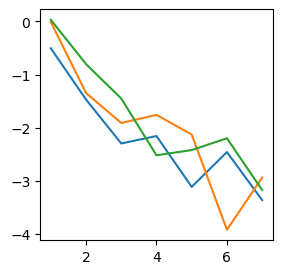

In [72]:
# 回帰変数の数
M = 2
# サンプルサイズの常用対数の最大
Lmax = 8
AAs = []
for L in range(1, Lmax):
    # サンプルサイズを変える
    N = 10**L
    
    # dataset
    X1 = np.random.rand(N)
    X2 = np.random.rand(N)
    Y = A0 + A1*X1 + A2*X2 + np.random.randn(X1.size)
    
    # X の設定
    XX = np.hstack([X1.reshape(-1, 1), X2.reshape(-1, 1)])
    # XX = np.zeros((N, M))
    # XX[:, 0] = X1
    # XX[:, 1] = X2
    
    # sklearn の LinearRegression で fitting
    reg = linear_model.LinearRegression()
    reg.fit(XX, Y)
    a0, a1, a2 = reg.intercept_, reg.coef_[0], reg.coef_[1]
    AAs.append([a0, a1, a2])
    
    #print('scikit-learn の LinearRegression で得られた重回帰モデル： %9.6f + %9.6f * x1 + %9.6f * x2'
    #      %(reg.intercept_, reg.coef_[0], reg.coef_[1]))    

AAs = np.array(AAs)
print(AAs)
# 結果の描画
fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(np.arange(1, Lmax), np.log10(np.abs(A0-AAs[:, 0]))) # a0-AAs[:, 0] としていたのが間違い
ax.plot(np.arange(1, Lmax), np.log10(np.abs(A1-AAs[:, 1])))
ax.plot(np.arange(1, Lmax), np.log10(np.abs(A2-AAs[:, 2])))

# 演習問題 3-3

第2回その3で Iris データセットを用いて線形回帰モデルを適用した．そこでは目的変数として `Petal Length` を取り，単回帰では説明変数に `Sepal Length` を，重回帰では説明変数に `Sepal Length` と `Petal Width` を用いてモデルを立てた．さらには `Species` でデータを分けて種別に回帰することでよりフィッティングが合うようにした．

では，目的変数と説明変数を全ての組み合わせを取り替えて線形回帰モデルを試し，回帰変数の数とフィッティング精度に傾向があるか確かめよ．（植物学的に意味があるかはさておき）一番フィッティングの合う線形回帰モデルは何か．その理由も考えよ．

<h3><div style="text-align: right;">その2につづく</div></h3>